<a href="https://colab.research.google.com/github/RSNROXX/Analysis-of-Indian-and-US-Stocks-Using-ML-Models/blob/main/LinearRegression_NIFTY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)

In [ ]:
data = pd.read_csv("/content/NiftyNSEI (1).csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2.1.15,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900
1,5.1.15,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200
2,6.1.15,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800
3,7.1.15,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100
4,8.1.15,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800


NameError: ignored

In [ ]:
df = pd.DataFrame(data, columns=['Date','Close'])

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Date,Close
0,0,2.1.15,8395.450195
1,1,5.1.15,8378.400391
2,2,6.1.15,8127.350098
3,3,7.1.15,8102.100098
4,4,8.1.15,8234.599609


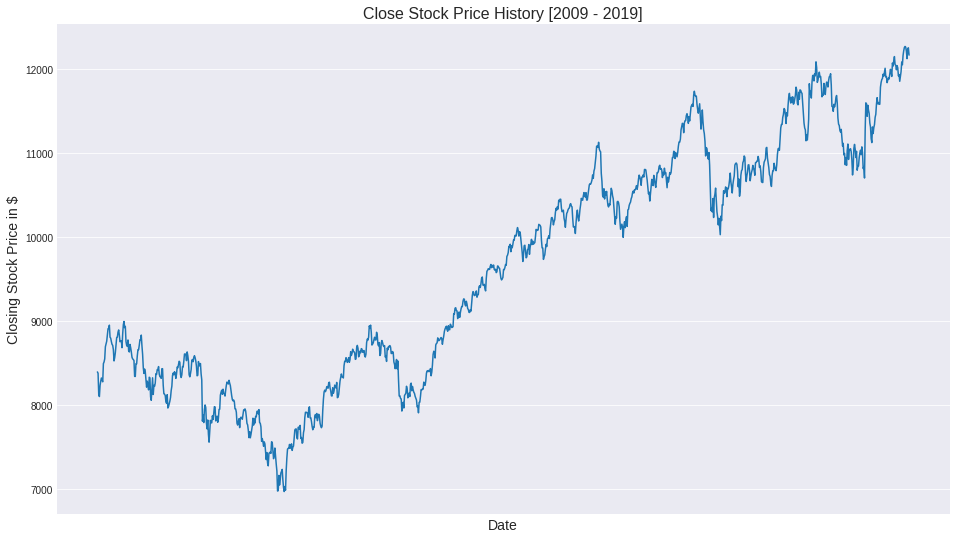

In [ ]:
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close Stock Price History [2009 - 2019]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing Stock Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [ ]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [ ]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  3.6003394422536443
Intercept:  7433.300026204159


<ipython-input-14-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


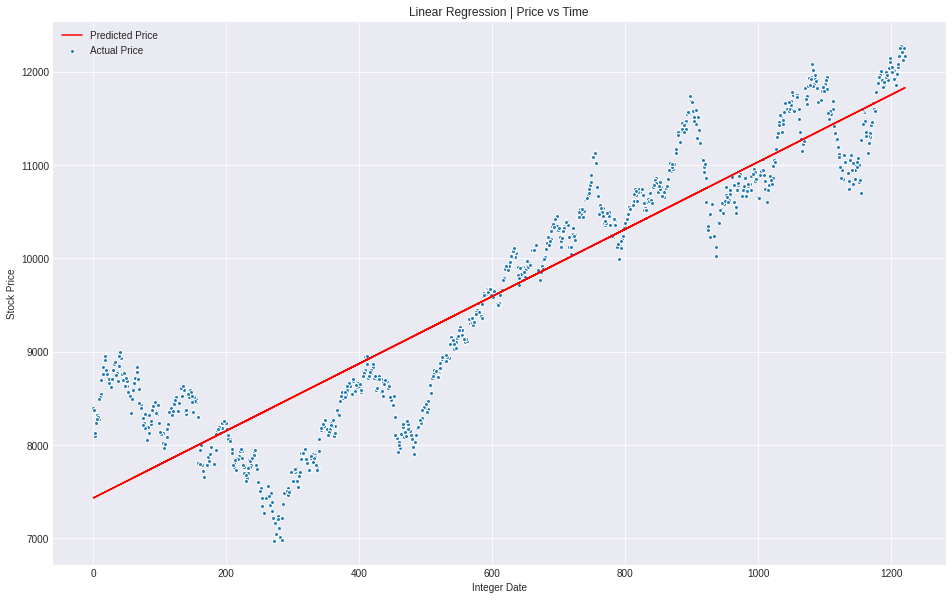

In [ ]:
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [ ]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [ ]:
# Get number of rows in data set for random sample
df.shape

(1222, 3)

In [ ]:
# Generate 25 random numbers
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [ ]:
df_sample.head()

,index,Date,Close
137,137,24.7.15,8521.549805
152,152,14.8.15,8518.549805
227,227,8.12.15,7701.700195
386,386,1.8.16,8636.549805
495,495,11.1.17,8380.650391


In [ ]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [ ]:
df.head()

,index,Date,Close,Prediction
0,0,2.1.15,8395.450195,7433.300026
1,1,5.1.15,8378.400391,7436.900366
2,2,6.1.15,8127.350098,7440.500705
3,3,7.1.15,8102.100098,7444.101045
4,4,8.1.15,8234.599609,7447.701384


In [ ]:
df


,index,Date,Close,Prediction
0,0,2.1.15,8395.450195,7433.300026
1,1,5.1.15,8378.400391,7436.900366
2,2,6.1.15,8127.350098,7440.500705
3,3,7.1.15,8102.100098,7444.101045
4,4,8.1.15,8234.599609,7447.701384
...,...,...,...,...
1217,1217,24.12.19,12214.549810,11814.913127
1218,1218,26.12.19,12126.549810,11818.513467
1219,1219,27.12.19,12245.799810,11822.113806
1220,1220,30.12.19,12255.849610,11825.714146
